In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

In [2]:
data= pd.read_csv("C:/Users/hp/OneDrive/Desktop/Documents/INT351/Zomato.csv")

In [3]:
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [5]:
data.tail()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
209994,3200362,Domino's Pizza,['Quick Bites'],https://www.zomato.com/vadodara/dominos-pizza-...,"19-21, Ground Floor, Procube, Nizampura, Vadodara",Vadodara,32,Nizampura,22.339587,73.178392,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Cash', '...",3.7,Good,658,33,0.0,-1,-1
209995,3200936,Foodies - The Food Court,['Quick Bites'],https://www.zomato.com/vadodara/foodies-the-fo...,"VIP Complex, Urjita Hospital, VIP Road, Kareli...",Vadodara,32,Karelibaug,22.326419,73.201824,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.6,Good,609,48,0.0,-1,-1
209996,3200071,Domino's Pizza,['Quick Bites'],https://www.zomato.com/vadodara/dominos-pizza-...,"Ground Floor, Shop 1-3, Near DMart, Pancham Ic...",Vadodara,32,Diwalipura,22.294861,73.153305,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Debit C...",3.7,Good,743,39,0.0,-1,-1
209997,3201616,Snappy Pizza,['Quick Bites'],https://www.zomato.com/vadodara/snappy-pizza-a...,"Shop G01, India Bulls Mega Mall, Old Ambica Mi...",Vadodara,32,Akota,22.306613,73.179998,...,1,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'Debit...",4.3,Very Good,264,83,0.0,1,-1
209998,3200955,KFC,['Quick Bites'],https://www.zomato.com/vadodara/kfc-manjalpur?...,"3rd Floor, Eva Mall, Manjalpur, Vadodara",Vadodara,32,Manjalpur,22.273322,73.188565,...,2,Rs.,"['Takeaway Available', 'Dinner', 'Credit Card'...",4.1,Very Good,503,27,0.0,1,-1


In [7]:
data.shape

(209999, 26)

In [8]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
209994     True
209995     True
209996     True
209997     True
209998     True
Length: 209999, dtype: bool

In [9]:
data.drop_duplicates(['res_id'],keep='first', inplace=True)
data.shape

(55062, 26)

In [10]:
data.isnull()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209957,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209963,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
print(data["name"].unique())
print(data["name"].nunique())

['Bikanervala' 'Mama Chicken Mama Franky House' 'Bhagat Halwai' ...
 'Delicacy Restaurant & Banquet' 'New Millennium Restaurant'
 'Aavkar Restaurant']
40796


In [6]:
print(data["city"].unique())
print(data["city"].nunique())

['Agra' 'Ahmedabad' 'Gandhinagar' 'Ajmer' 'Alappuzha' 'Allahabad'
 'Amravati' 'Amritsar' 'Aurangabad' 'Bangalore' 'Bhopal' 'Bhubaneshwar'
 'Chandigarh' 'Mohali' 'Panchkula' 'Zirakpur' 'Nayagaon' 'Chennai'
 'Coimbatore' 'Cuttack' 'Darjeeling' 'Dehradun' 'New Delhi' 'Gurgaon'
 'Noida' 'Faridabad' 'Ghaziabad' 'Greater Noida' 'Dharamshala' 'Gangtok'
 'Goa' 'Gorakhpur' 'Guntur' 'Guwahati' 'Gwalior' 'Haridwar' 'Hyderabad'
 'Secunderabad' 'Indore' 'Jabalpur' 'Jaipur' 'Jalandhar' 'Jammu'
 'Jamnagar' 'Jamshedpur' 'Jhansi' 'Jodhpur' 'Junagadh' 'Kanpur'
 'Kharagpur' 'Kochi' 'Kolhapur' 'Kolkata' 'Howrah' 'Kota' 'Lucknow'
 'Ludhiana' 'Madurai' 'Manali' 'Mangalore' 'Manipal' 'Udupi' 'Meerut'
 'Mumbai' 'Thane' 'Navi Mumbai' 'Mussoorie' 'Mysore' 'Nagpur' 'Nainital'
 'Nasik' 'Nashik' 'Neemrana' 'Ooty' 'Palakkad' 'Patiala' 'Patna'
 'Puducherry' 'Pune' 'Pushkar' 'Raipur' 'Rajkot' 'Ranchi' 'Rishikesh'
 'Salem' 'Shimla' 'Siliguri' 'Srinagar' 'Surat' 'Thrissur' 'Tirupati'
 'Trichy' 'Trivandrum' 'Udaipur' 'V

Domino's Pizza     397
Cafe Coffee Day    308
KFC                204
Baskin Robbins     200
Keventers          187
Subway             175
Pizza Hut          125
McDonald's         124
Barbeque Nation    112
Burger King        110
Name: name, dtype: int64
DH's Food Express                                1
Masala Box                                       1
Hotel Trishul                                    1
The Noodle Bowl                                  1
New Gobinda Dhaba                                1
Modern A Complete Family Restaurant Cum Dhaba    1
New D Dhaba                                      1
Brahmaputra Dhaba                                1
Nanda Bhog Dhaba                                 1
Aavkar Restaurant                                1
Name: name, dtype: int64
True     35951
False     4845
Name: name, dtype: int64


Text(0.5, 1.0, 'Top 10 outlets on zomato')

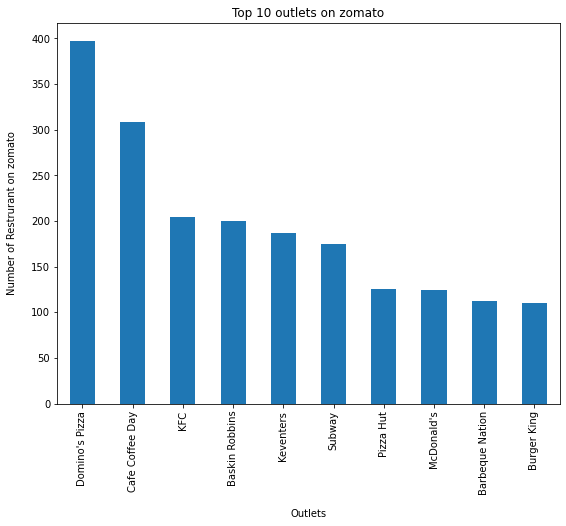

In [14]:
outlet= (data['name'].value_counts()).head(10)
print(outlet)
print((data['name'].value_counts()).tail(10))
print((data['name'].value_counts()==1).value_counts())


outlet.plot(kind='bar', figsize=(9, 7))
plt.xlabel("Outlets", labelpad=14)
plt.ylabel("Number of Restrurant on zomato", labelpad=14)
plt.title("Top 10 outlets on zomato")

True     35951
False     4845
Name: name, dtype: int64
False    37960
True      2836
Name: name, dtype: int64
False    38787
True      2009
Name: name, dtype: int64


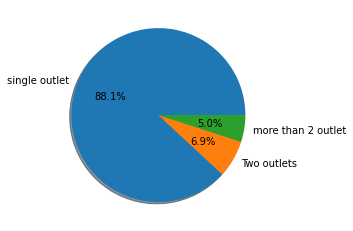

In [18]:
print((data['name'].value_counts()==1).value_counts())
print((data['name'].value_counts()==2).value_counts())
print((data['name'].value_counts()>2).value_counts())

low_outlet= np.array([36210, 2845, 2045])
y1= ['single outlet','Two outlets', 'more than 2 outlet']
plt.pie(low_outlet, labels = y1, autopct='%1.1f%%', shadow=True)
plt.show() 

In [19]:
data['establishment'].value_counts()

['Quick Bites']        13941
['Casual Dining']      12257
['Café']                4042
['Bakery']              3657
['Dessert Parlour']     3596
['Sweet Shop']          2582
['Beverage Shop']       2408
[]                      1828
['Fine Dining']         1535
['Food Court']          1452
['Bar']                 1399
['Dhaba']               1278
['Kiosk']               1107
['Food Truck']           854
['Lounge']               820
['Bhojanalya']           625
['Mess']                 361
['Pub']                  357
['Paan Shop']            317
['Confectionery']        216
['Butcher Shop']         154
['Club']                 112
['Microbrewery']         110
['Shack']                 20
['Cocktail Bar']          16
['Irani Cafe']            14
['Pop up']                 4
Name: establishment, dtype: int64

Text(0.5, 1.0, 'Percentage of different establishment used by restrurants')

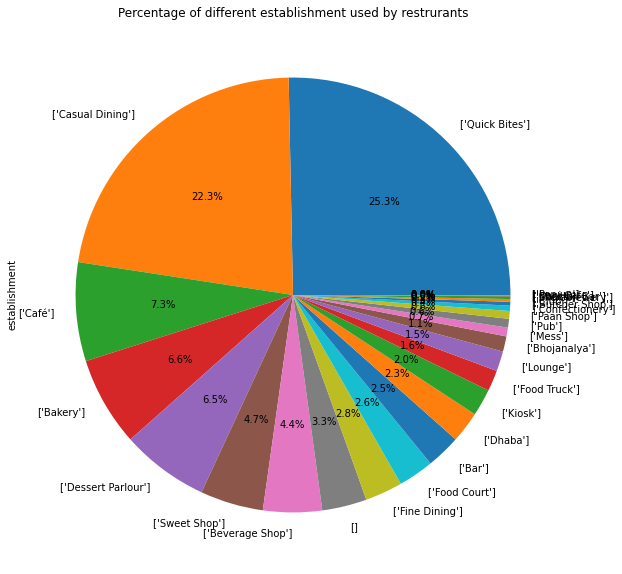

In [20]:
(data['establishment'].value_counts()).plot(kind='pie',autopct='%1.1f%%', figsize=(25,10) )
plt.title("Percentage of different establishment used by restrurants")

<AxesSubplot:title={'center':'Highly rated establishment'}, xlabel='Establishments', ylabel='Average rating'>

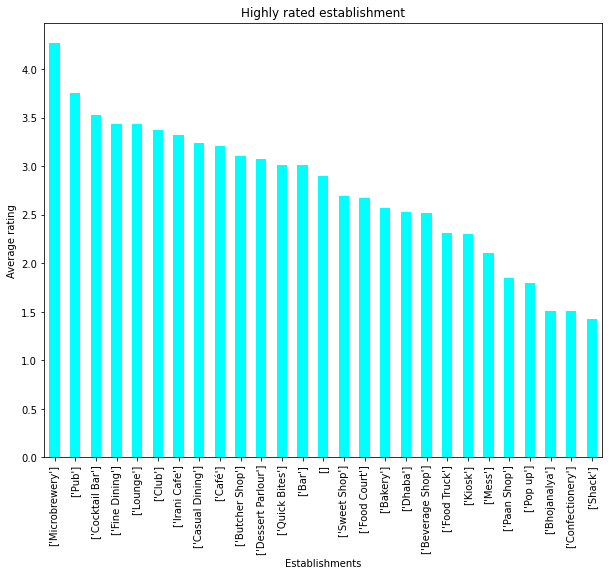

In [21]:
rating_by_est = data.groupby("establishment").mean()["aggregate_rating"].sort_values(ascending=False)
rating_by_est.plot(kind='bar', color='cyan', figsize=(10,8), title='Highly rated establishment', xlabel='Establishments', ylabel='Average rating')

Bangalore    2247
Mumbai       2022
Pune         1843
Chennai      1827
New Delhi    1704
Jaipur       1395
Kolkata      1361
Ahmedabad    1247
Goa          1150
Lucknow      1135
Name: city, dtype: int64


Text(0.5, 1.0, 'Number of Restrurant available on zomato per city')

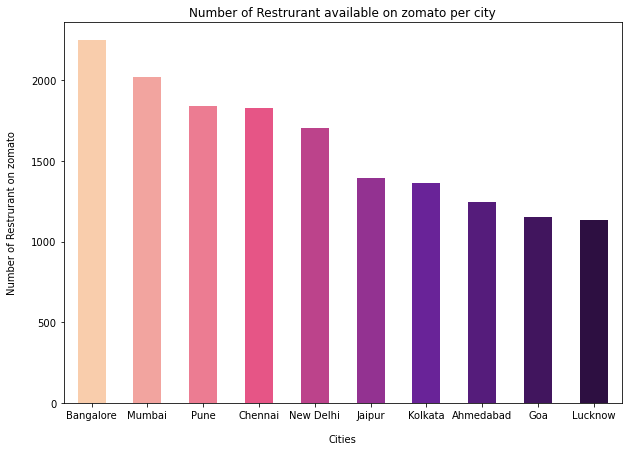

In [22]:
#print(data['city'].value_counts())
print((data['city'].value_counts()).head(10))

((data['city'].value_counts()).head(10)).plot(kind='bar', figsize=(10, 7), rot=0, color= ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]);
plt.xlabel("Cities", labelpad=14)
plt.ylabel("Number of Restrurant on zomato", labelpad=14)
plt.title("Number of Restrurant available on zomato per city")

#print((data['city'].value_counts()).tail(10))

In [23]:
print(data['cuisines'].unique())
print(data['cuisines'].nunique())

['North Indian, South Indian, Mithai, Street Food, Desserts'
 'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food'
 'Fast Food, Mithai' ... 'Chinese, North Indian, Italian, Thai'
 'North Indian, Bakery, South Indian, Continental, Fast Food, Chinese'
 'Mughlai, Chinese, Biryani']
9355


<AxesSubplot:title={'center':'Top 5 outlet offering North Indian and having maximum chains'}, xlabel="Outlet's name", ylabel='Number of outlets in different cities'>

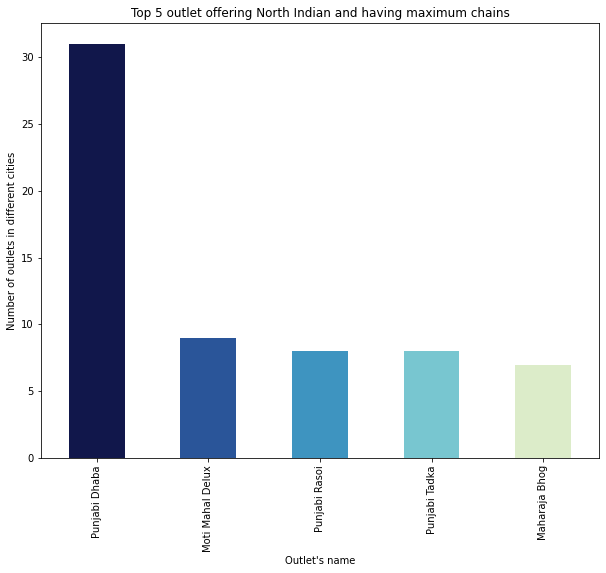

In [24]:
data.loc[data["cuisines"]=='North Indian','name'].value_counts()
(data.loc[data["cuisines"]=='North Indian','name'].value_counts()[:5]).plot(kind='bar', color=['#11174b', '#2a5599', '#3e94c0', '#78c6d0', '#dcecc9'], title='Top 5 outlet offering North Indian and having maximum chains', xlabel="Outlet's name", ylabel='Number of outlets in different cities', figsize=(10,8))

[  700   600   300  1000   400   500  1200  1600   250   200   150  1500
   800   450   850   350   900  6000   650   550  2500  6500  5500  4300
  3600  3500  3200  3000  2800  2000  1800  1400  1300  1250  1150  1100
  1050    50    60   100   750     0   220   260   950  1900  2400  2300
  2200  1700  1230    70   140   120   470    20    40   110    80    90
   440  2100 14000  5000  4500  4100  4000  3700  3400  2700  2600  1650
  1350   180  1260     2   197   312   170   240   330  3100  4200  1850
  3300  4800  3800  3250  2900  1750   282    35   149  1550  5100  6600
  1450   160  2250  8000  7000  3900  3650  1020   320   360   280   130
 15000  2501    30  1950  1875  1190   309 12000   380   299    45   190
  4600   880    75   620   999 10000   505 30000  4050   175   404   445
   640    15   420   115   444   592  1499   208   940   125  7500   520
   294]
145
200    6508
300    6313
400    5140
500    4682
100    4627
       ... 
309       1
380       1
299       1
45  

<AxesSubplot:>

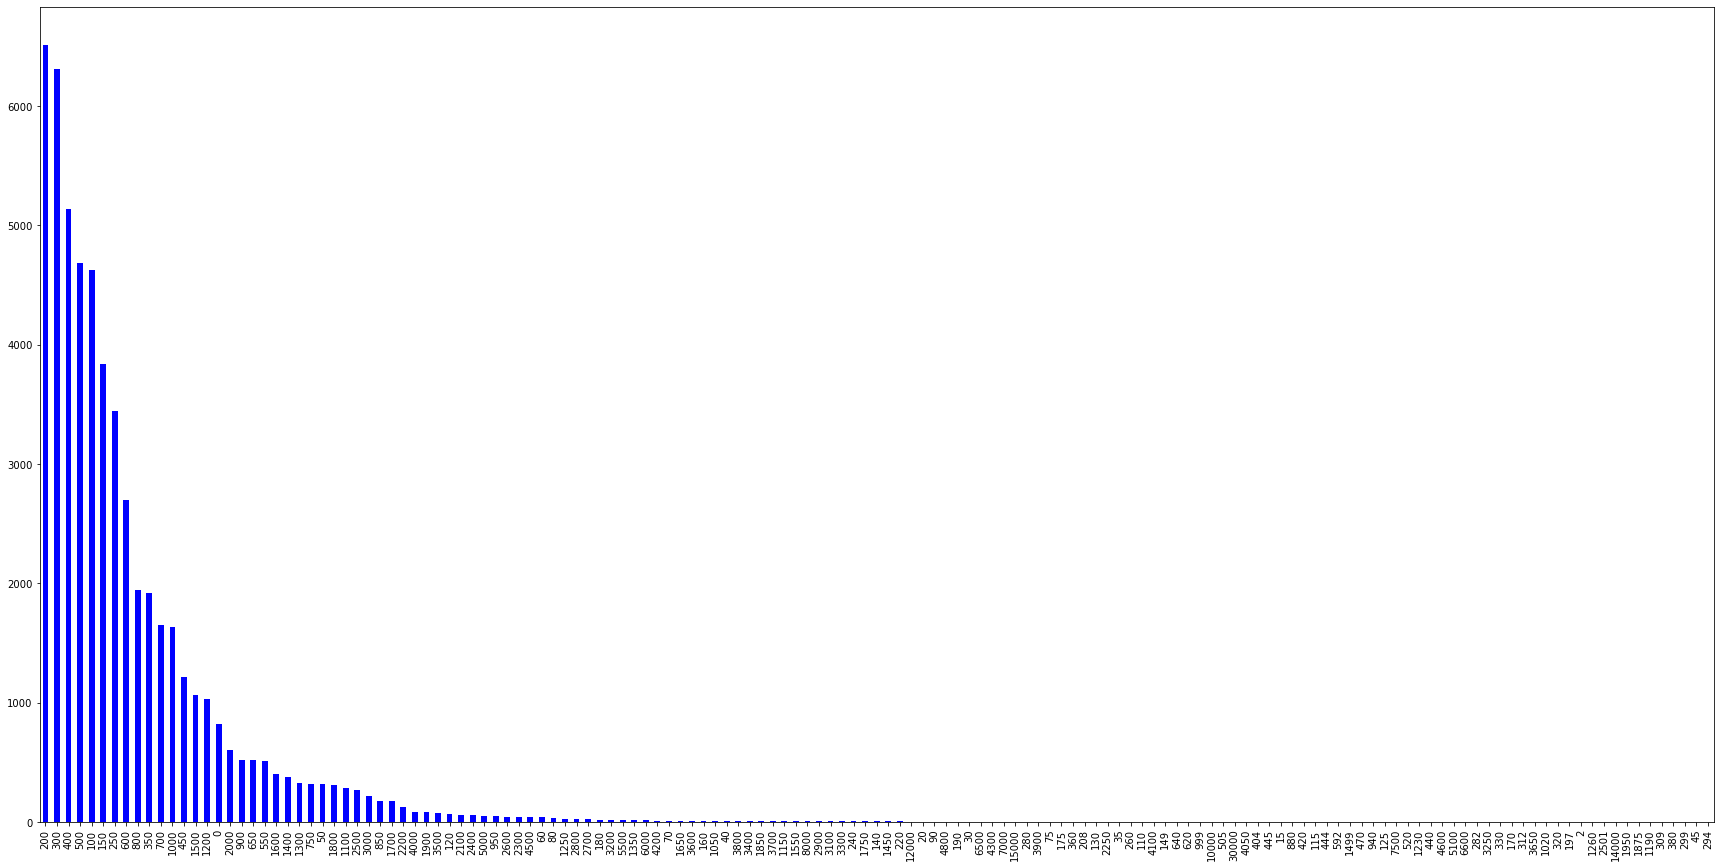

In [25]:
a=data["average_cost_for_two"].unique()
print(a)
print(data["average_cost_for_two"].nunique())
#print(data["average_cost_for_two"])
print(data["average_cost_for_two"].value_counts())
(data["average_cost_for_two"].value_counts()).plot(kind='bar', figsize=(30,15), color='blue')

name
Ocean - The Private Dining Room - Sahara Star    30000.0
Bhairo                                           15000.0
Gol Bungalow - Taj Falaknuma Palace              15000.0
Fly Dining                                       14000.0
Trophy Bar- Umaid Bhawan Palace                  12000.0
Risala- Umaid Bhawan Palace                      12000.0
Pillars - Umaid Bhawan Palace                    12000.0
Wasabi By Morimoto - The Taj Mahal Palace        10000.0
Adaa - Taj Falaknuma Palace                       8000.0
The Kebab Shop - The Raj Palace                   8000.0
Name: average_cost_for_two, dtype: float64
136240    Mumbai
Name: city, dtype: object
136240    3.6
Name: aggregate_rating, dtype: float64


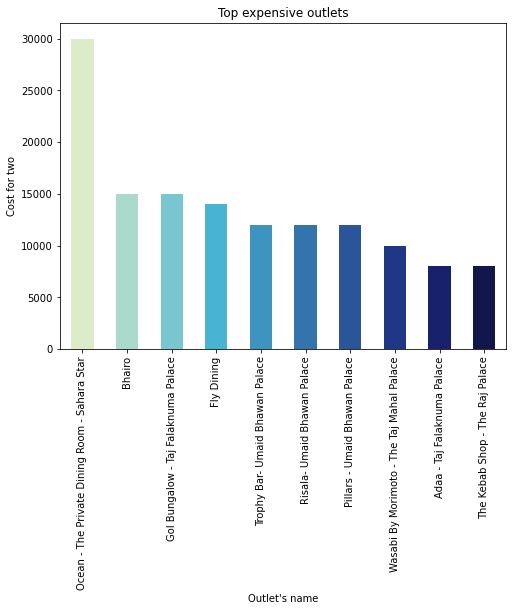

In [26]:
data.groupby("name").mean()['average_cost_for_two'].sort_values(ascending=False)
print(data.groupby("name").mean()['average_cost_for_two'].sort_values(ascending=False).head(10))
data.groupby("name").mean()['average_cost_for_two'].sort_values(ascending=False)[:10].plot(kind='bar',title="Top expensive outlets", xlabel="Outlet's name", ylabel='Cost for two', color=['#dcecc9', '#aadacc', '#78c6d0', '#48b3d3', '#3e94c0', '#3474ac', '#2a5599', '#203686', '#18216b', '#11174b'], figsize=(8,6))
print(data.loc[data['name']=='Ocean - The Private Dining Room - Sahara Star','city'])
print(data.loc[data['name']=='Ocean - The Private Dining Room - Sahara Star','aggregate_rating'])

<AxesSubplot:xlabel='price range'>

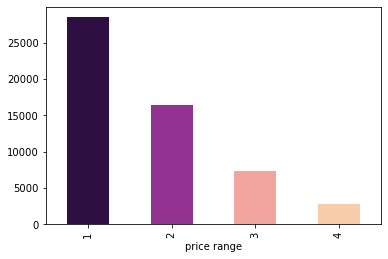

In [27]:
colors=["#2d0f41",'#933291',"#f2a49f","#f9cdac"]
(data["price_range"].value_counts()).plot(kind='bar', color=colors, xlabel='price range')

city
Goa           2.770435
Varanasi      2.291595
Puducherry    2.223592
Mumbai        2.205737
Dehradun      2.188235
                ...   
Tirupati      1.253394
Kharagpur     1.173469
Jamnagar      1.112245
Amravati      1.089474
Junagadh      1.051546
Name: price_range, Length: 99, dtype: float64


<AxesSubplot:xlabel='city'>

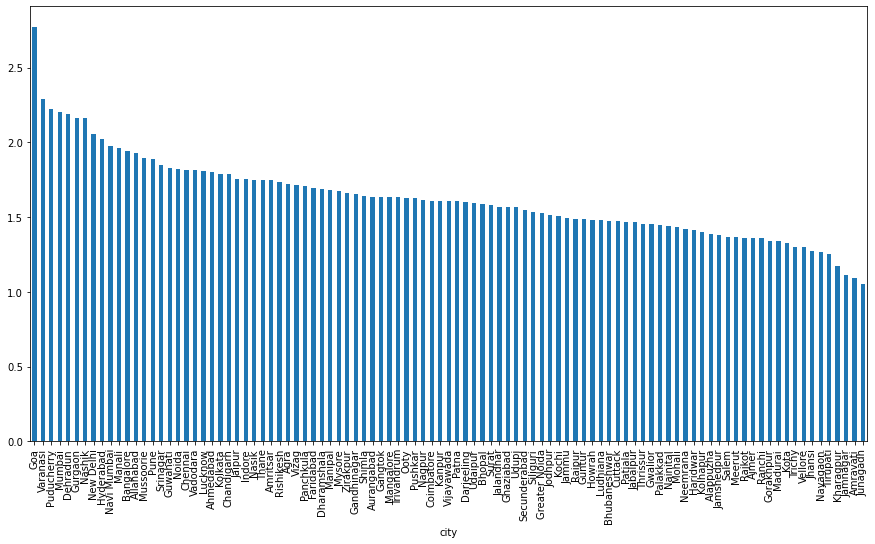

In [28]:
price_name= data.groupby('city').mean()['price_range'].sort_values(ascending=False)
print(price_name)
price_name.plot(kind='bar', figsize=(15,8))

price_range
1    2.601249
2    3.216162
3    3.496933
4    3.649107
Name: aggregate_rating, dtype: float64


<AxesSubplot:title={'center':'Average rating v/s Price range'}, xlabel='Price range', ylabel='Average of ratings'>

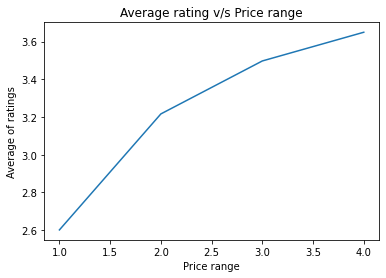

In [29]:
rating_price= data.groupby('price_range').mean()['aggregate_rating'].sort_values(ascending=True)
print(rating_price)
(rating_price).plot(kind='line', xlabel='Price range', ylabel='Average of ratings', title='Average rating v/s Price range')

price_range
1     216.525843
2     522.988473
3    1091.472249
4    2288.293781
Name: average_cost_for_two, dtype: float64


<AxesSubplot:title={'center':'Price range v/s Average cost for two'}, xlabel='Price range', ylabel='Average cost for two'>

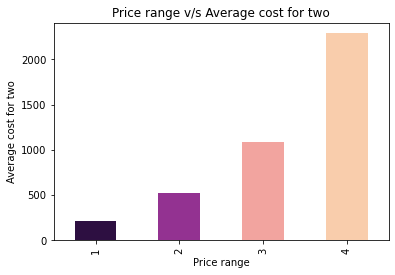

In [30]:
rating_price= data.groupby('price_range').mean()["average_cost_for_two"].sort_values(ascending=True)
print(rating_price)
(rating_price).plot(kind='bar', xlabel='Price range', ylabel='Average cost for two', title='Price range v/s Average cost for two', color=colors)

In [31]:
data['currency'].unique()

array(['Rs.'], dtype=object)

In [32]:
print(data['highlights'].unique())
print(data['highlights'].nunique())

["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"
 "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']"
 "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']"
 ...
 "['Cash', 'Takeaway Available', 'No Alcohol Available', 'Dinner', 'Delivery', 'Credit Card', 'Lunch', 'Indoor Seating', 'Air Conditioned', 'Pure Veg']"
 "['Credit Card', 'Delivery', 'Cash', 'Lunch', 'Dinner', 'Debit Card', 'Air Conditioned', 'Indoor Seating']"
 "['Cash', 'Debit Card', 'Lunch', 'No Alcohol Available', 'Credit Card', 'Dinner', 'Takeaway Available', 'Indoor Seating', 'Air Conditioned', 'Digital Payments Accepted']"]
30971


<AxesSubplot:>

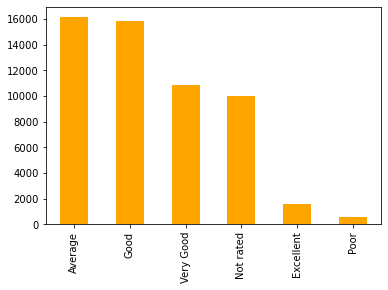

In [33]:
(data['rating_text'].value_counts()[:6]).plot(kind='bar', color='orange')

<AxesSubplot:>

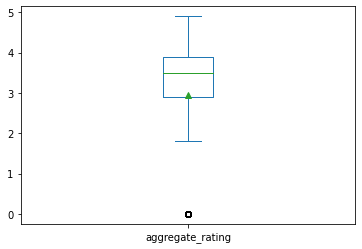

In [34]:
data['aggregate_rating'].sort_values(ascending=False).plot(kind='box', showmeans=True)

4              The Salt Cafe Kitchen & Bar
16                          Pinch Of Spice
22                          Pinch Of Spice
34                  Cafe Turquoise Cottage
36        Tea'se Me - Rooftop Tea Boutique
                        ...               
209393                            Le Privé
209401                         Cafe Fitoor
209572                      Juvenas Bakery
209573                       Infi Pizzeria
209580             Santushti Shakes & More
Name: name, Length: 939, dtype: object
939
Barbeque Nation                 44
AB's - Absolute Barbecues       19
Chili's Grill & Bar              9
Chili's American Grill & Bar     6
Onesta                           5
                                ..
Doodle's Garden                  1
Saladspoint                      1
Fourty Four                      1
Fat Cat Bistro                   1
Santushti Shakes & More          1
Name: name, Length: 766, dtype: int64


Text(0.5, 1.0, 'Top 10 high rated restaurant ')

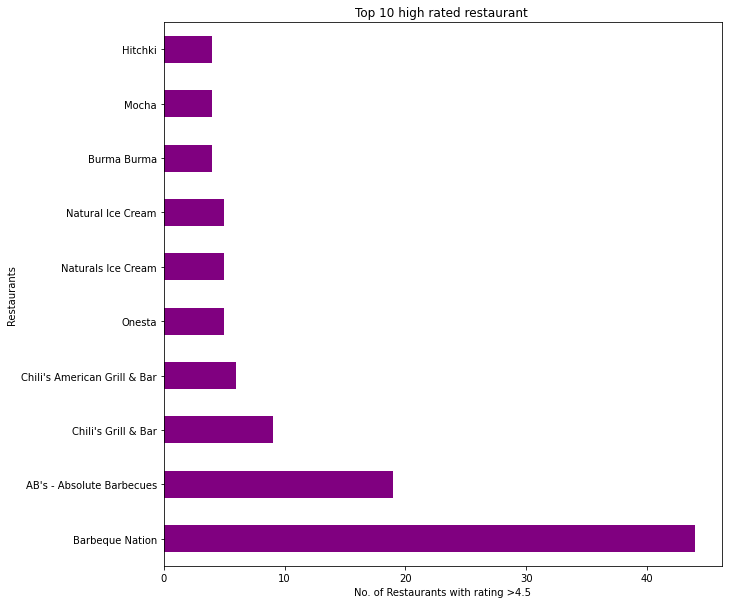

In [35]:
r1= (data.loc[data['aggregate_rating'] > 4.5, 'name'])
print(r1)
print(len(r1))
print(r1.value_counts())
((r1.value_counts()).head(10)).plot(kind='barh', color='purple', figsize=(10,10))
plt.ylabel("Restaurants")
plt.xlabel("No. of Restaurants with rating >4.5")
plt.title("Top 10 high rated restaurant ")

0.0    9994
3.9    3502
3.8    3381
3.7    3282
4.0    3282
3.6    2966
3.2    2880
3.4    2748
3.3    2744
4.1    2735
3.5    2707
4.2    2192
3.1    1752
4.3    1612
3.0    1571
2.9    1471
2.8    1154
4.4    1070
2.7     856
4.5     682
2.6     570
4.6     428
2.5     396
2.4     300
4.7     239
2.3     167
4.8     142
4.9     130
2.2      65
2.1      28
2.0      10
1.9       4
1.8       2
Name: aggregate_rating, dtype: int64


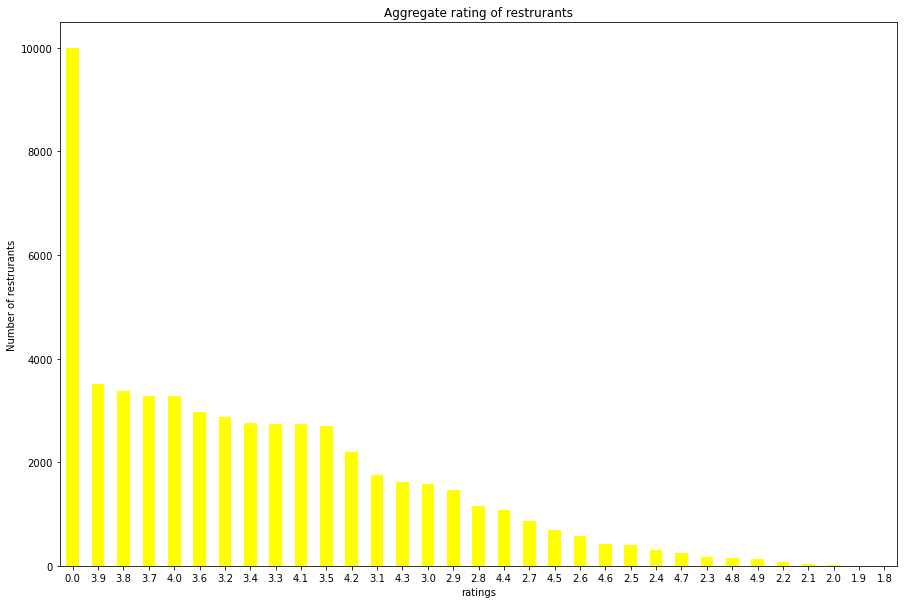

In [37]:
print(data['aggregate_rating'].value_counts())
(data['aggregate_rating'].value_counts()).plot(kind='bar', figsize=(15,10), rot=0, color=['yellow'])
plt.xlabel('ratings')
plt.ylabel('Number of restrurants')
plt.title("Aggregate rating of restrurants")
plt.show()

<AxesSubplot:title={'center':'Top rated city per outlet'}, xlabel='City', ylabel='average rating'>

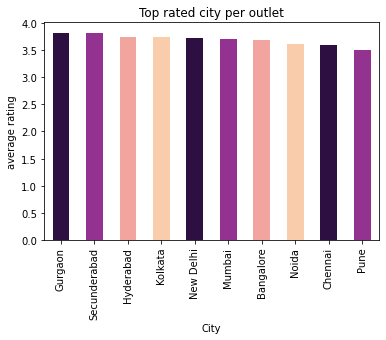

In [38]:
data.groupby('city').mean()['aggregate_rating'].sort_values(ascending=False)[:10].plot(kind='bar', color=colors, title='Top rated city per outlet', xlabel='City', ylabel='average rating')

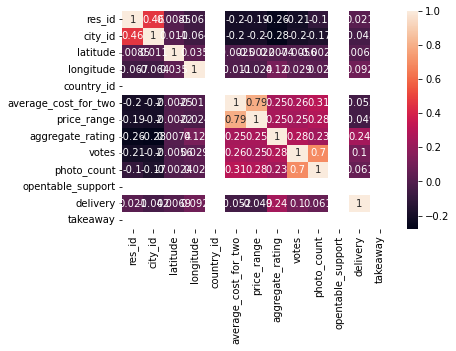

In [40]:
#Heatmap
sns.heatmap(data.corr(),annot=True)
plt.show()

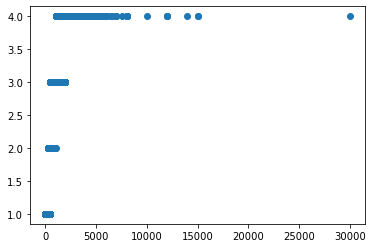

In [41]:
# NUMERICAL - NUMERICAL ASSOCIATIONS
plt.scatter(data.average_cost_for_two,data.price_range)
plt.show()

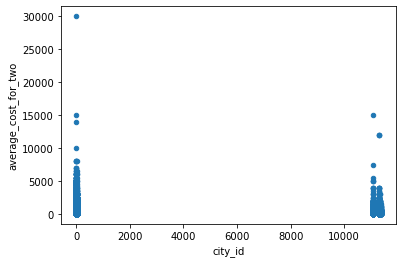

In [42]:
# Scatter Plot
data.plot.scatter(x="city_id",y="average_cost_for_two")
plt.show()

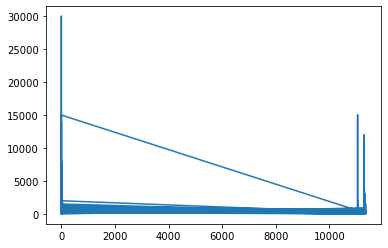

In [43]:
# Line Plot
x = data.city_id
y = data.average_cost_for_two
plt.plot(x, y)
plt.show()

<AxesSubplot:>

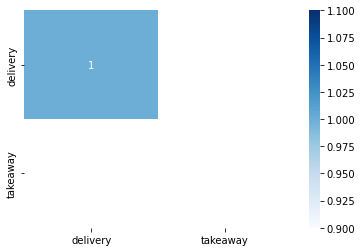

In [44]:
# Correlation Matrix
sns.heatmap(data[["delivery","takeaway"]].corr(), annot=True, cmap="Blues")

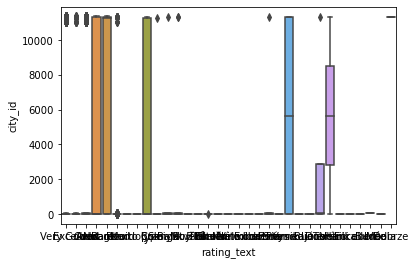

In [45]:
# CATEGORICAL - NUMERICAL ASSOCIATIONS
# Box Plot
sns.boxplot(data=data, x="rating_text", y="city_id")
plt.show(5)

<AxesSubplot:xlabel='votes', ylabel='photo_count'>

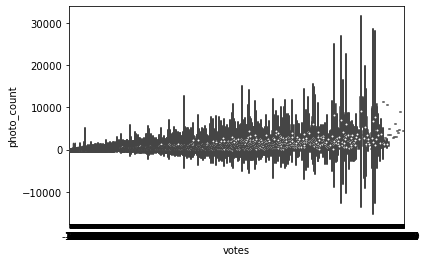

In [46]:
# Violin Plot
sns.violinplot(x=data["votes"], y=data["photo_count"])

<AxesSubplot:ylabel='rating_text'>

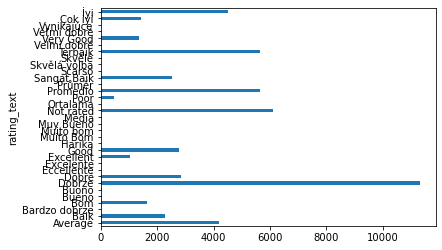

In [47]:
# Bar Graph
data.groupby("rating_text")["city_id"].mean().plot.barh()

In [11]:
data.loc[:, "votes":"takeaway"]

,votes,photo_count,opentable_support,delivery,takeaway
0,814,154,0.0,-1,-1
1,1203,161,0.0,-1,-1
2,801,107,0.0,1,-1
3,693,157,0.0,1,-1
4,470,291,0.0,1,-1
...,...,...,...,...,...
209994,658,33,0.0,-1,-1
209995,609,48,0.0,-1,-1
209996,743,39,0.0,-1,-1
209997,264,83,0.0,1,-1


<Figure size 720x480 with 0 Axes>

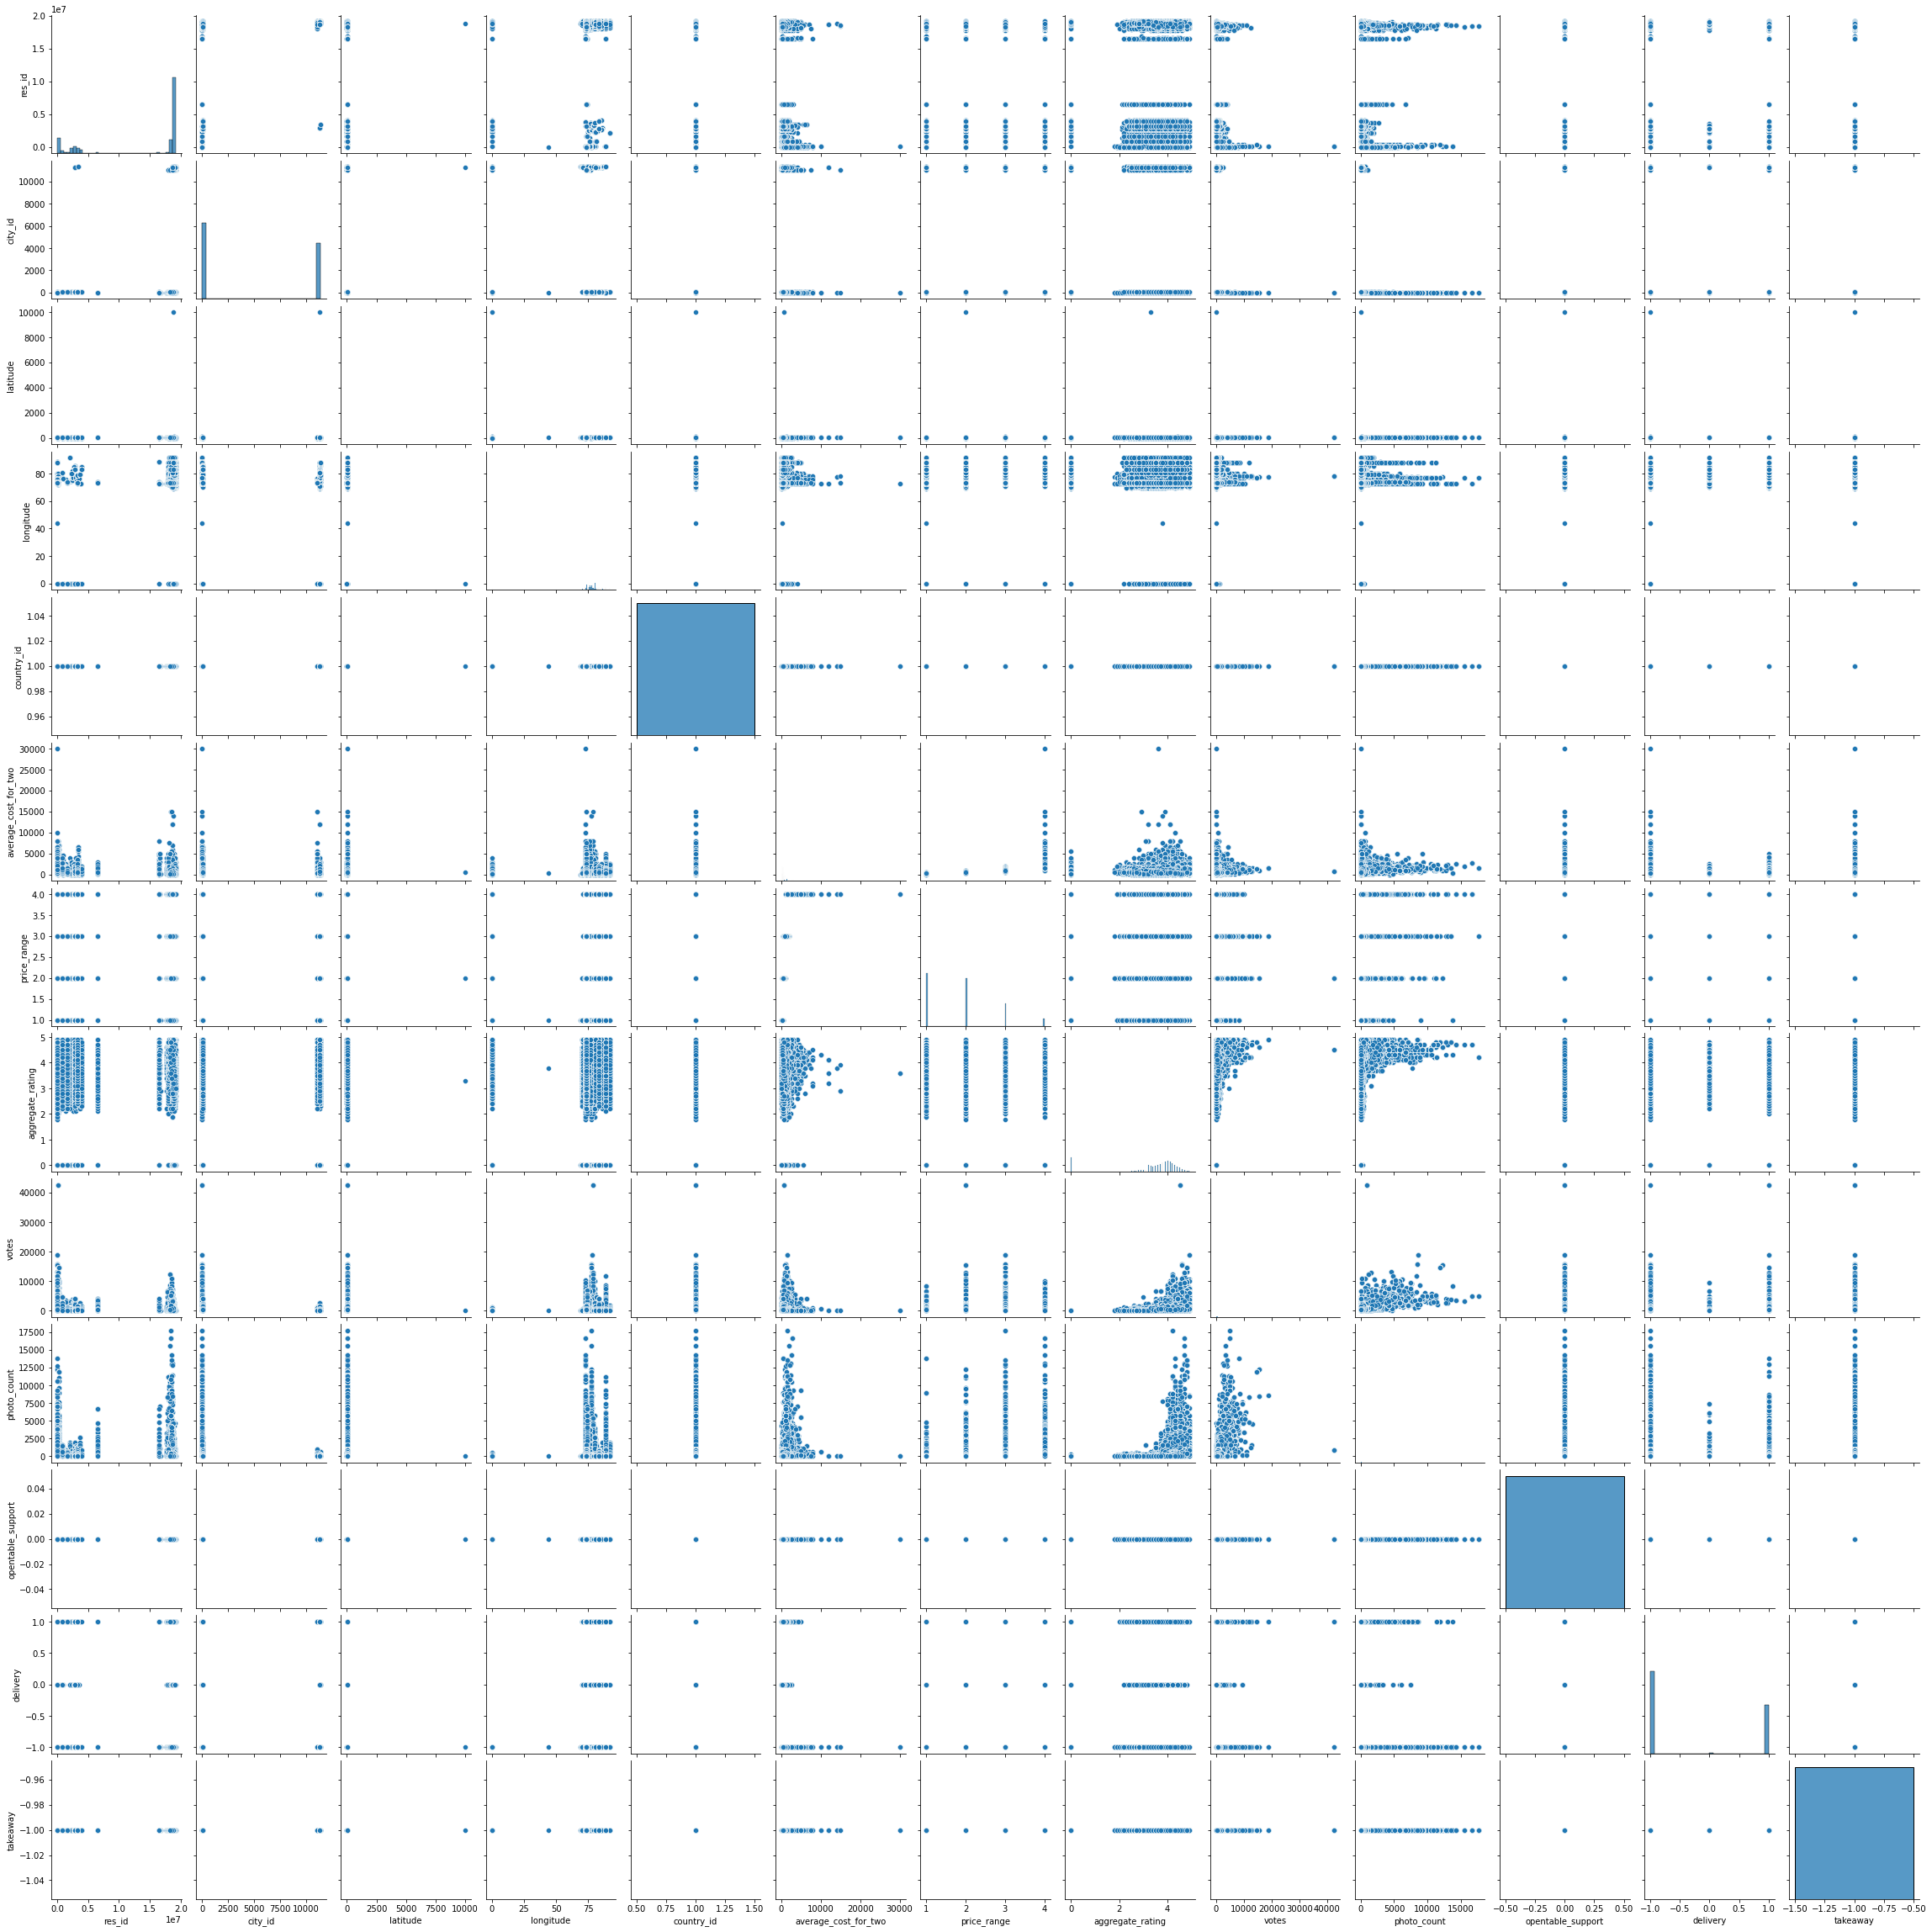

In [38]:
plt.figure(dpi=120)
sns.pairplot(data)
plt.show()

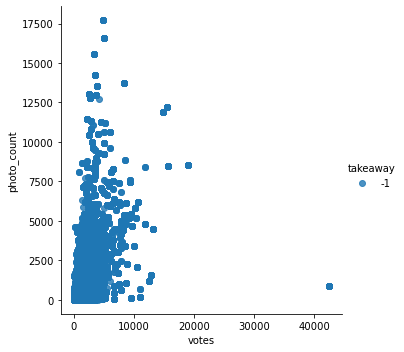

In [21]:
sns.lmplot("votes", "photo_count", data, hue="takeaway", fit_reg=False);

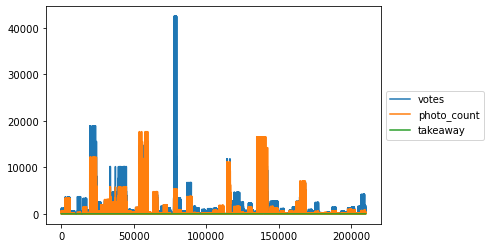

In [24]:
ax = data[["votes","photo_count","takeaway"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [30]:
X = data.loc[:, "votes":]  # independent variables data
y = data.photo_count  # dependednt variable data
data

0         154
1         161
2         107
3         157
4         291
         ... 
209994     33
209995     48
209996     39
209997     83
209998     27
Name: photo_count, Length: 209999, dtype: int64

In [31]:
X.apply(np.mean)

votes                378.280339
photo_count          258.452378
opentable_support      0.000000
delivery              -0.259311
takeaway              -1.000000
dtype: float64

In [32]:
X.apply(np.std)

votes                929.064323
photo_count          871.440942
opentable_support      0.000000
delivery               0.963241
takeaway               0.000000
dtype: float64

In [35]:
corr = stats.pearsonr(X.votes, X.photo_count)
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 0.0
cor:		 0.6552638953278248


In [36]:
corrmat = X.corr()
corrmat


,votes,photo_count,opentable_support,delivery,takeaway
votes,1.000000,0.655264,NaN,0.028734,NaN
photo_count,0.655264,1.000000,NaN,-0.017735,NaN
opentable_support,NaN,NaN,NaN,NaN,NaN
delivery,0.028734,-0.017735,NaN,1.000000,NaN
takeaway,NaN,NaN,NaN,NaN,NaN


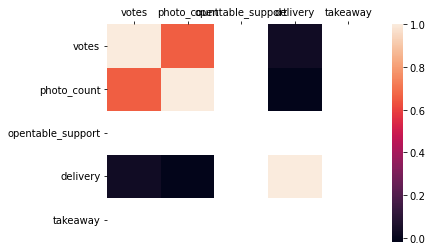

In [37]:
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

Conclusion

1)Domino's pizza,cafe coffe day, KFC, Baskin Robbins have the maximum number of outlets in India on zomato. 
2)There are only 5% outlets who have more than 2 chains on zomato. 
3)Approx 25% of restaurants have quick bites establishment and Domino's pizza's outlets has maximum quick bite establishment. Microbrewery establishment has the maximum rating. 
4)Bangalore has the maximum number of outlets. 
5)Mostly outlets has North Indian, chinese and fast food cuisine and very few outlets offers Internatinal,vegan, swedish and mandi cuisines. 
6)Punjabi Dhada has maximum chain which offering North Indian cuisine. 
7)The different outlets have different tinings but mostly fall into 10 am to 11 pm. 
8)Maximum oulets offer the budget friendly cost of for two which lies between 200-900. Ocean - The Private Dining Room - Sahara Star located in has the maximum cost for two i.e., 30000. 
9)The price range is corelated with rating and cost for two. As the cost for two increases, the chance of a restaurant having higher rating and price range increases. 
10)Very less outlets have the poor rating, mostly fall in average rating. 
11)he rating of mostly outlets lie between 3-4. Barbeque nation' s outlets has the maximum rating. 
12)Gurgaon has highest rated restaurants whereas City hyderabad shows the maximum number votes per outlet and Mumbai has the maximum photo count. 
13)Hauz khas social has the maximum average votes and the prankster has the maximum photo counts